CODSOFT DATA SCIENCE INTERNSHIP

NOV BATCH A18

TASK 3

BY DARSHIKA R K

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [ ]:
iris_df = pd.read_csv("/content/drive/MyDrive/CodeSoft/IRIS.csv")

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['species']

Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model training

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)

Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Visualization

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

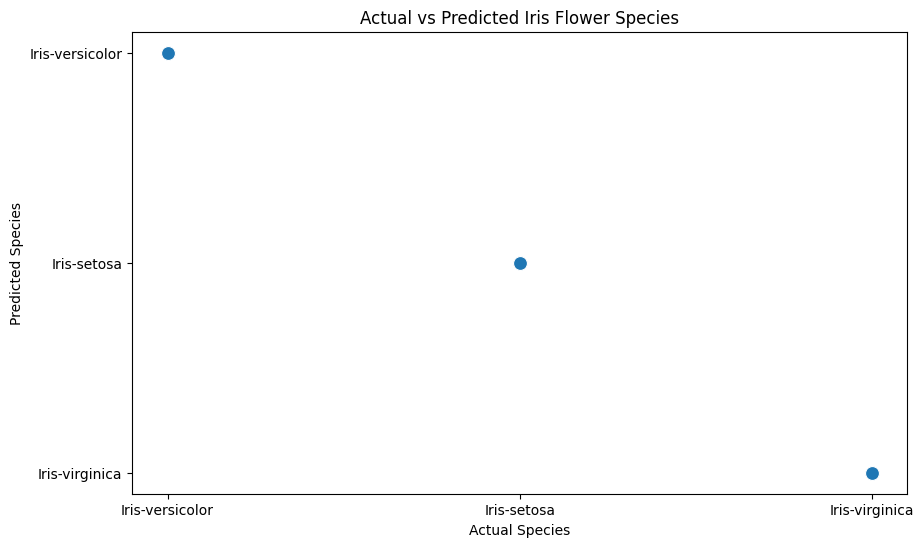

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, s=100, palette='viridis', hue_order=[0, 1, 2], legend='full')
plt.title('Actual vs Predicted Iris Flower Species')
plt.xlabel('Actual Species')
plt.ylabel('Predicted Species')
plt.show()

Text(0, 0.5, 'Frequency')

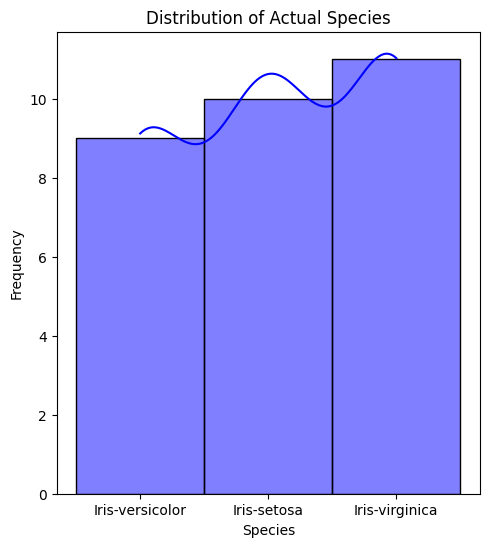

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(results['Actual'], bins=3, kde=True, color='blue')
plt.title('Distribution of Actual Species')
plt.xlabel('Species')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

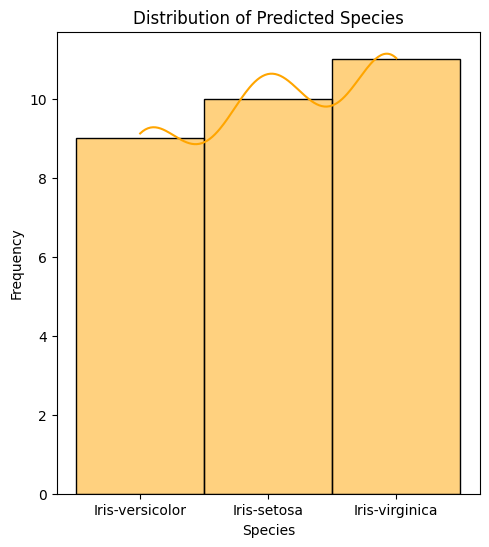

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(results['Predicted'], bins=3, kde=True, color='orange')
plt.title('Distribution of Predicted Species')
plt.xlabel('Species')
plt.ylabel('Frequency')



In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

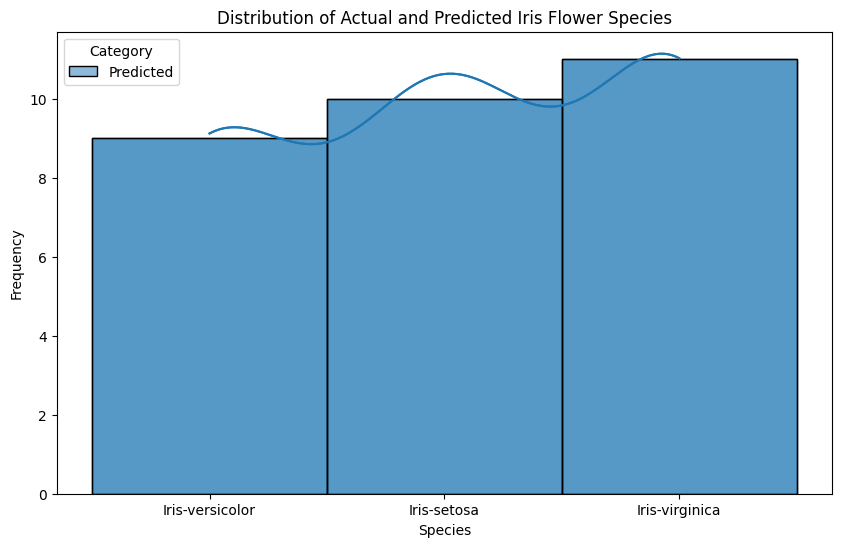

In [ ]:
plt.figure(figsize=(10, 6))
results['Category'] = 'Actual'
sns.histplot(data=results, x='Actual', hue='Category', multiple='stack', bins=3, kde=True, color='blue')
results['Category'] = 'Predicted'
sns.histplot(data=results, x='Predicted', hue='Category', multiple='stack', bins=3, kde=True, color='orange')

plt.title('Distribution of Actual and Predicted Iris Flower Species')
plt.xlabel('Species')
plt.ylabel('Frequency')

plt.show()